# Epileptic Seizure Prediction


# Importing Dependencies

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve,auc

# Loading Dataset

In [4]:
seizure=pd.read_csv(r"F:\DataSets\epileptic_seizure\Epileptic Seizure Recognition.csv")

# Preview of Dataset

In [5]:
seizure.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


# Data Structure

In [6]:
seizure.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


In [7]:
seizure.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000


# Finding Missing Values

In [8]:
seizure.isnull().sum()

Unnamed    0
X1         0
X2         0
X3         0
X4         0
          ..
X175       0
X176       0
X177       0
X178       0
y          0
Length: 180, dtype: int64

`Therefore, there are no missing values in the data`

# Data Pre-processing

In [9]:
seizure = seizure.drop(columns=['Unnamed'])

In [10]:
seizure.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [11]:
seizure['y'] = seizure['y'].apply(lambda x: 1 if x == 1 else 0)

In [12]:
seizure.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


`1 stands for Epileptic Seizure whereas 0 signifies absence of seizure in the y column`

C:\Users\kunal\AppData\Local\Temp\ipykernel_13164\2008581951.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='y', data=seizure, palette=['blue', 'orange'])


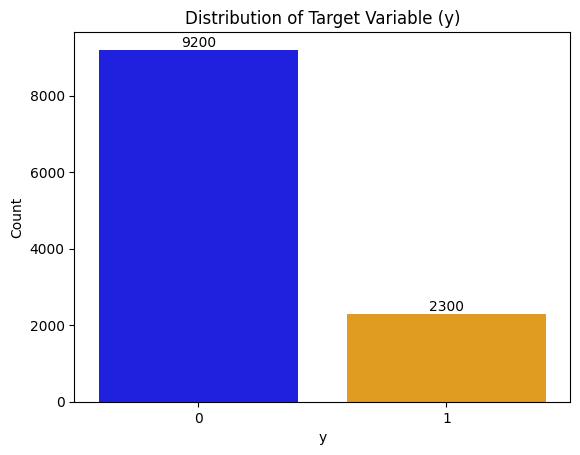

In [13]:
ax = sns.countplot(x='y', data=seizure, palette=['blue', 'orange'])
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')
plt.title('Distribution of Target Variable (y)')
plt.xlabel('y')
plt.ylabel('Count')
plt.show()

`The number of trials for the non-seizure class is: 9200 &
The number of trials for the seizure class is: 2300`


In [14]:
X=seizure.drop(columns=['y'])
y=seizure['y']

# Splitting the data into train and test

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

# Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler=StandardScaler()

In [18]:
X_train=scaler.fit_transform(X_train)

In [19]:
X_test=scaler.fit_transform(X_test)

# Dimensionality Reduction

In [20]:
from sklearn.decomposition import PCA

In [21]:
pca=PCA()
pca.fit_transform(X_train)

array([[-2.51568303e+00,  7.58788034e-01,  1.38034377e+00, ...,
         2.97879727e-03, -1.93247942e-02,  7.17291870e-03],
       [-3.37119415e-01,  8.97312135e-01, -3.96564133e-01, ...,
         3.31414543e-02, -1.13865862e-02, -2.90760932e-02],
       [-1.07573852e+00, -6.78522676e-01, -4.49202664e-01, ...,
        -1.60353288e-02,  3.20981587e-03,  4.38868943e-03],
       ...,
       [ 1.55759212e+00,  5.91248223e-01,  3.04959285e-01, ...,
        -6.70981780e-03,  1.03504699e-02,  1.61270257e-02],
       [ 1.93171801e+00, -2.13886951e+00, -2.20199339e+00, ...,
         1.33044739e-03, -6.51581208e-03, -1.83716115e-02],
       [-4.37168341e-01, -8.54393092e-01, -6.22634954e-02, ...,
         6.98371019e-03,  8.49391907e-02, -6.26340909e-02]],
      shape=(9200, 178))

In [22]:
cum_var=np.cumsum(pca.explained_variance_ratio_)

In [23]:
no_of_features=np.argmax(cum_var>=0.95)
print(no_of_features)

38


`Therefore, number of features required is 39`

In [24]:
pca=PCA(n_components=39)

In [25]:
X_train=pca.fit_transform(X_train)
X_test=pca.fit_transform(X_test)

# Training Model - Logistic Regression

In [26]:
lr=LogisticRegression() 

In [27]:
lrmodel=lr.fit(X_train,y_train)

In [28]:
y_pred=lr.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score

In [30]:
print("accuracy score:",accuracy_score(y_test,y_pred))
print("f1 score:",f1_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred))
print("recall score:",recall_score(y_test,y_pred))

accuracy score: 0.8039130434782609
f1 score: 0.05845511482254697
precision score: 1.0
recall score: 0.030107526881720432


In [31]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

C:\Users\kunal\anaconda3\envs\myenv\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\kunal\anaconda3\envs\myenv\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\kunal\anaconda3\envs\myenv\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\kunal\anaconda3\envs\myenv\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\kunal\anaconda3\envs\myenv\lib\subprocess.py", line 1456, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executabl

In [32]:
lr=LogisticRegression() 

In [33]:
lrmodel=lr.fit(X_resampled, y_resampled)

In [34]:
y_pred=lr.predict(X_test)

In [35]:
print("accuracy score:",accuracy_score(y_test,y_pred))
print("f1 score:",f1_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred))
print("recall score:",recall_score(y_test,y_pred))

accuracy score: 0.5926086956521739
f1 score: 0.31953522149600583
precision score: 0.2412280701754386
recall score: 0.4731182795698925


In [36]:
from imblearn.under_sampling import RandomUnderSampler
RUS = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled1, y_resampled1 =RUS.fit_resample(X_train, y_train)

In [37]:
lr=LogisticRegression() 

In [38]:
lrmodel=lr.fit(X_resampled1, y_resampled1)

In [39]:
y_pred=lr.predict(X_test)

In [40]:
print("accuracy score:",accuracy_score(y_test,y_pred))
print("f1 score:",f1_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred))
print("recall score:",recall_score(y_test,y_pred))


accuracy score: 0.5452173913043479
f1 score: 0.2903663500678426
precision score: 0.21209117938553024
recall score: 0.46021505376344085


In [41]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
roc_auc1=auc(fpr,tpr)

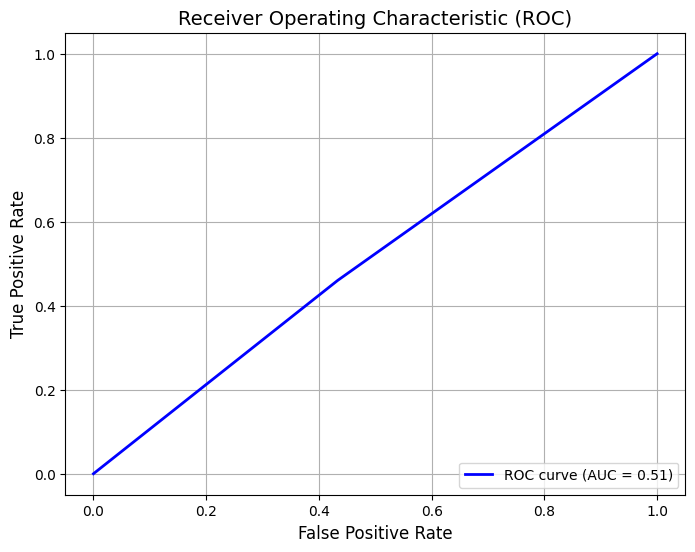

In [42]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc1:.2f})')
plt.title('Receiver Operating Characteristic (ROC)', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Training Model - SVM

In [43]:
from sklearn.svm import SVC

In [44]:
svm_model=SVC(kernel="rbf",C=1)

In [45]:
svm_model.fit(X_train,y_train)

SVC(C=1)

In [46]:
y_pred_svm=svm_model.predict(X_test)

In [47]:
print("accuracy score:",accuracy_score(y_test,y_pred_svm))
print("f1 score:",f1_score(y_test,y_pred_svm))
print("precision score:",precision_score(y_test,y_pred_svm))
print("recall score:",recall_score(y_test,y_pred_svm))

accuracy score: 0.9608695652173913
f1 score: 0.9023861171366594
precision score: 0.9102844638949672
recall score: 0.8946236559139785


# Training Model - Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rf=RandomForestClassifier(n_estimators=150,min_samples_leaf=1,min_samples_split=2,bootstrap=True)

In [50]:
rf_model=rf.fit(X_train,y_train)

In [51]:
y_pred_rf=rf_model.predict(X_test)

In [52]:
print("accuracy score:",accuracy_score(y_test,y_pred_rf))
print("f1 score:",f1_score(y_test,y_pred_rf))
print("precision score:",precision_score(y_test,y_pred_rf))
print("recall score:",recall_score(y_test,y_pred_rf))

accuracy score: 0.9643478260869566
f1 score: 0.9140461215932913
precision score: 0.8916155419222904
recall score: 0.9376344086021505


# Training Model - XGBoost

In [53]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [54]:
from xgboost import XGBClassifier

In [55]:
xgb=XGBClassifier(n_estimators=150,max_depth=8,learning_rate=0.1)

In [56]:
xgb_model=xgb.fit(X_train,y_train)

In [57]:
y_pred_xgb=xgb_model.predict(X_test)

In [58]:
print("accuracy score:",accuracy_score(y_test,y_pred_xgb))
print("f1 score:",f1_score(y_test,y_pred_xgb))
print("precision score:",precision_score(y_test,y_pred_xgb))
print("recall score:",recall_score(y_test,y_pred_xgb))

accuracy score: 0.9669565217391304
f1 score: 0.9184549356223176
precision score: 0.9164882226980728
recall score: 0.9204301075268817


# Training Model - Naive Bayes

In [59]:
from sklearn.naive_bayes import GaussianNB

In [60]:
nb=GaussianNB()

In [61]:
nb_model=nb.fit(X_train,y_train)

In [62]:
y_pred_nb=nb_model.predict(X_test)

In [63]:
print("accuracy score:",accuracy_score(y_test,y_pred_nb))
print("f1 score:",f1_score(y_test,y_pred_nb))
print("precision score:",precision_score(y_test,y_pred_nb))
print("recall score:",recall_score(y_test,y_pred_nb))

accuracy score: 0.95
f1 score: 0.8815653964984552
precision score: 0.8458498023715415
recall score: 0.9204301075268817


# Training Model - K Nearest Neighbors

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
knn=KNeighborsClassifier(n_neighbors=3)

In [66]:
knn_model=knn.fit(X_train,y_train)

In [67]:
y_pred_knn=knn_model.predict(X_test)

In [68]:
print("accuracy score:",accuracy_score(y_test,y_pred_knn))
print("f1 score:",f1_score(y_test,y_pred_knn))
print("precision score:",precision_score(y_test,y_pred_knn))
print("recall score:",recall_score(y_test,y_pred_knn))

accuracy score: 0.9047826086956522
f1 score: 0.6962552011095701
precision score: 0.98046875
recall score: 0.5397849462365591


In [81]:
fpr2,tpr2,thresholds=roc_curve(y_test,y_pred_knn)
roc_auc3=auc(fpr2,tpr2)

# Training Model - Decision Tree

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
dt=DecisionTreeClassifier(max_depth=12,min_samples_leaf=1,min_samples_split=2)

In [71]:
dt_model=dt.fit(X_train,y_train)

In [72]:
y_pred_dt=dt_model.predict(X_test)

In [73]:
print("accuracy score:",accuracy_score(y_test,y_pred_dt))
print("f1 score:",f1_score(y_test,y_pred_dt))
print("precision score:",precision_score(y_test,y_pred_dt))
print("recall score:",recall_score(y_test,y_pred_dt))

accuracy score: 0.94
f1 score: 0.8445945945945946
precision score: 0.8865248226950354
recall score: 0.8064516129032258


In [78]:
fpr1,tpr1,thresholds=roc_curve(y_test,y_pred_dt)
roc_auc2=auc(fpr1,tpr1)

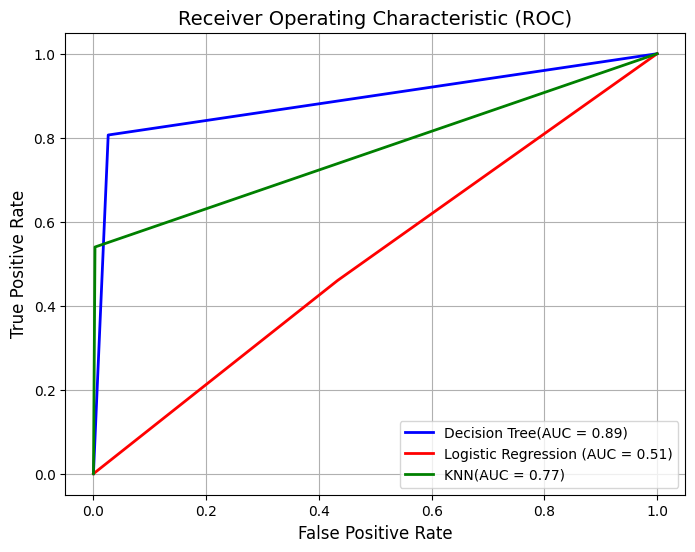

In [83]:
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='blue', lw=2, label=f'Decision Tree(AUC = {roc_auc2:.2f})')
plt.plot(fpr, tpr, color='red', lw=2, label=f'Logistic Regression (AUC = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, color='green', lw=2, label=f'KNN(AUC = {roc_auc3:.2f})')
plt.title('Receiver Operating Characteristic (ROC)', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Training Model - ANN

In [ ]:
pip install TensorFlow

In [84]:
import tensorflow as tf

In [85]:
from tensorflow import keras

In [86]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall

In [87]:
ann_model=keras.Sequential([
    keras.layers.Dense(64,activation='relu',input_shape=(39,)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1,activation='sigmoid')
])

C:\Users\kunal\anaconda3\envs\myenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [88]:
ann_model.compile(optimizer=Adam(learning_rate=0.01),loss="binary_crossentropy",metrics=["accuracy",Precision(),Recall()])

In [89]:
ann=ann_model.fit(X_train,y_train,epochs=20,verbose=2,validation_split=0.2)

Epoch 1/20
230/230 - 3s - 13ms/step - accuracy: 0.9171 - loss: 0.2796 - precision: 0.7886 - recall: 0.7831 - val_accuracy: 0.9478 - val_loss: 0.1382 - val_precision: 0.9586 - val_recall: 0.7980
Epoch 2/20
230/230 - 1s - 3ms/step - accuracy: 0.9617 - loss: 0.1234 - precision: 0.9270 - recall: 0.8712 - val_accuracy: 0.9663 - val_loss: 0.0993 - val_precision: 0.9649 - val_recall: 0.8793
Epoch 3/20
230/230 - 1s - 3ms/step - accuracy: 0.9654 - loss: 0.0951 - precision: 0.9229 - recall: 0.8964 - val_accuracy: 0.9636 - val_loss: 0.0870 - val_precision: 0.9357 - val_recall: 0.8966
Epoch 4/20
230/230 - 1s - 3ms/step - accuracy: 0.9647 - loss: 0.0878 - precision: 0.9276 - recall: 0.8873 - val_accuracy: 0.9674 - val_loss: 0.0860 - val_precision: 0.9436 - val_recall: 0.9064
Epoch 5/20
230/230 - 1s - 3ms/step - accuracy: 0.9700 - loss: 0.0776 - precision: 0.9370 - recall: 0.9062 - val_accuracy: 0.9625 - val_loss: 0.0960 - val_precision: 0.9566 - val_recall: 0.8695
Epoch 6/20
230/230 - 1s - 3ms/step

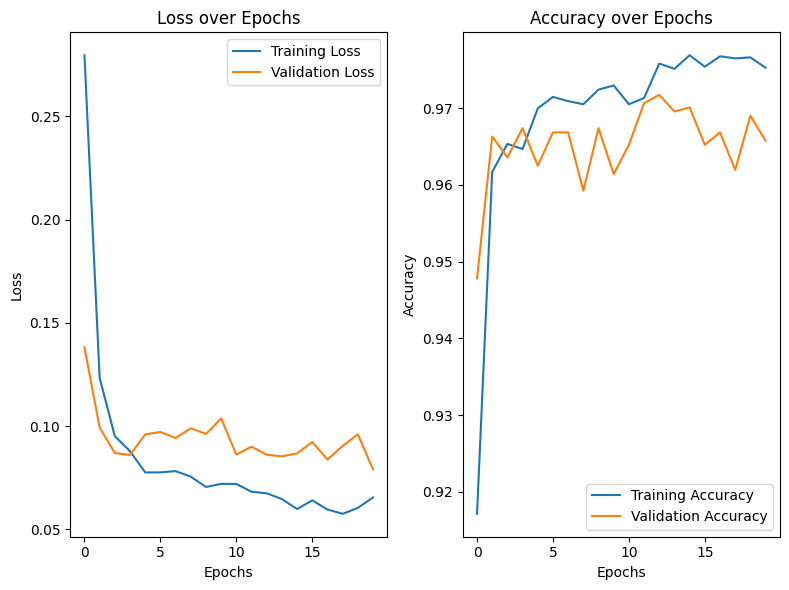

In [90]:
plt.figure(figsize=(8, 6))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(ann.history['loss'], label='Training Loss')
plt.plot(ann.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(ann.history['accuracy'], label='Training Accuracy')
plt.plot(ann.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()